# Example 10: Relativitistic Velocity Addition

In this example, we will symbolically regress $f(u,v)=\frac{u+v}{1+uv}$. In relavitity, we know the rapidity trick $f(u,v)={\rm tanh}({\rm arctanh}\ u+{\rm arctanh}\ v)$. Can we rediscover rapidity trick with KAN?

Intialize model and create dataset

In [1]:
from kan import *

# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=10, k=3)

# create dataset
f = lambda x: (x[:,[0]]+x[:,[1]])/(1+x[:,[0]]*x[:,[1]])
dataset = create_dataset(f, n_var=2, ranges=[-0.9,0.9])

Train KAN and plot

In [2]:
model.fit(dataset, opt="LBFGS", steps=20);

train loss: 6.82e-04 | test loss: 6.23e-04 | reg: 5.49e+00 : 100%|██| 20/20 [00:01<00:00, 12.20it/s]


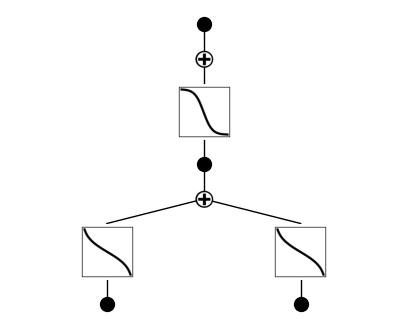

In [3]:
model.plot(beta=10)

Retrain the model, the loss remains similar, meaning that the locking does not degrade model behavior, justifying our hypothesis that these two activation functions are the same. Let's now determine what this function is using $\texttt{suggest_symbolic}$

In [4]:
model.suggest_symbolic(0,1,0,weight_simple=0.0)

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0  arctanh    0.999999 -16.470396           4                4  -16.470396
1      tan    0.999843 -12.552001           3                3  -12.552001
2   arccos    0.998866  -9.772025           4                4   -9.772025
3   arcsin    0.998866  -9.772025           4                4   -9.772025
4     sqrt    0.982270  -5.816821           2                2   -5.816821


('arctanh',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  4,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9999989867210388,
 4)

We can see that ${\rm arctanh}$ is at the top of the suggestion list! So we can set both to arctanh, retrain the model, and plot it.

In [6]:
model.fix_symbolic(0,0,0,'arctanh')
model.fix_symbolic(0,1,0,'arctanh')

r2 is 0.9999992251396179
r2 is 0.9999989867210388


-100000000.0

In [7]:
model.fit(dataset, opt="LBFGS", steps=20, update_grid=False);

train loss: 3.94e-04 | test loss: 4.73e-04 | reg: 5.55e+00 : 100%|██| 20/20 [00:01<00:00, 14.21it/s]


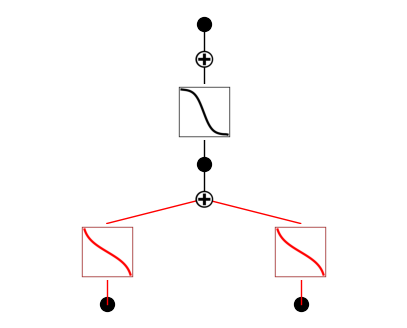

In [8]:
model.plot(beta=10)

We will see that ${\rm tanh}$ is at the top of the suggestion list! So we can set it to ${\rm tanh}$, retrain the model to machine precision, plot it and finally get the symbolic formula.

In [9]:
model.suggest_symbolic(1,0,0)

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0     tanh    0.999978 -14.913142           3                3   -0.582628
1        x    0.945766  -4.204389           1                1   -0.040878
2        0    0.000000   0.000014           0                0    0.000003
3      cos    0.995870  -7.916276           2                2    0.016745
4      sin    0.995870  -7.916276           2                2    0.016745


('tanh',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  3,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9999775886535645,
 3)

In [10]:
model.fix_symbolic(1,0,0,'tanh')

r2 is 0.9999775886535645


tensor(1.0000)

In [11]:
model.fit(dataset, opt="LBFGS", steps=20);

train loss: 7.02e-08 | test loss: 7.13e-08 | reg: 5.57e+00 : 100%|██| 20/20 [00:00<00:00, 37.15it/s]


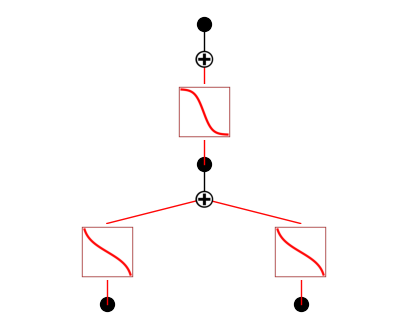

In [12]:
model.plot()

In [13]:
formula = model.symbolic_formula()[0][0]
nsimplify(ex_round(formula, 4))

tanh(atanh(x_1) + atanh(x_2))